# ProjectQ

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ionq-samples/getting-started/blob/main/projectq/main.ipynb)

ProjectQ is an open-source software framework for quantum computing that allows users to design, simulate, and optimize quantum circuits on various backends.

In [1]:
%%capture

# First, we install the essential libraries to our current Python runtime.
# "%%capture" (above) captures and in this case, hides the output of this 
# cell, so you can comment it out if you need help debugging this step.

%pip install projectq

In [2]:
import os
from getpass import getpass

import projectq.setups.ionq
from projectq import MainEngine
from projectq.backends import IonQBackend
from projectq.libs.hist import histogram
from projectq.ops import H, CNOT, Measure
import matplotlib.pyplot as plt

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys

# If your API key is stored as "IONQ_API_KEY" in your local environment, this
# should find it. Otherwise you'll be prompted to enter your API key manually.
 
token = os.getenv('IONQ_API_KEY') or getpass('Enter your IonQ API key: ')

# We need to specify the device where the circuit will be executed. In this 
# case we're using the `ionq_simulator`, but if you have QPU access you can
# specify it here to run the job on a QPU directly.

device = 'ionq_simulator'

backend = IonQBackend(token=token, device=device)
compiler_engines = projectq.setups.ionq.get_engine_list(token=token, device=device)
eng = MainEngine(backend, engine_list=compiler_engines)

In [4]:
qubit1 = eng.allocate_qubit()  # Allocate a quantum register with 1 qubit
qubit2 = eng.allocate_qubit()

H | qubit1  # Apply a Hadamard gate

CNOT | (qubit1, qubit2)  # Entangle the qubits

Measure | qubit1  # Measure the qubit
Measure | qubit2

eng.flush()  # Flush all gates (and execute measurements)

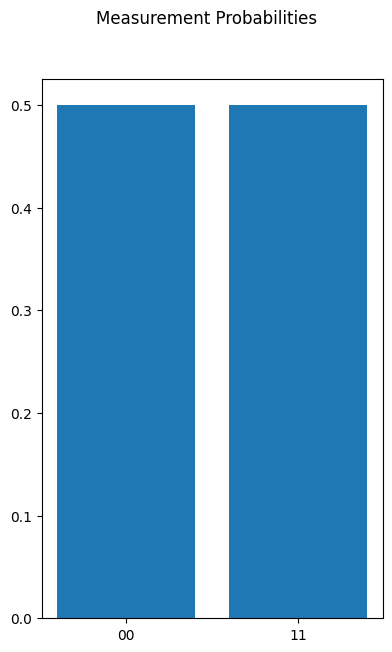

In [5]:
histogram(eng.backend, qubit1 + qubit2)
plt.show()